In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from symbolic_node import *
from utils import *
from genetic_programing import *
sns.set_style("whitegrid")

with open("data/data.txt") as ifile:
    lines = ifile.readlines()
    pts = np.array([line.strip().split(",") for line in lines],
                   dtype=np.float32)
x = pts[:,0]
y = pts[:,1]

## GP

In [3]:
gp = GeneticPrograming(x,y,one_over_mse)
gp.init_population()
for i in range(N_GENERATION):
    gp.evolve()
    print(i, gp.best_fitness)

/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw2/symbolic_node.py:22: RuntimeWarning: invalid value encountered in sin
  return self.f(self.lchild.post_order_traverse_recursive(x))
/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw2/symbolic_node.py:22: RuntimeWarning: invalid value encountered in cos
  return self.f(self.lchild.post_order_traverse_recursive(x))
/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw2/symbolic_node.py:24: RuntimeWarning: invalid value encountered in divide
  return self.f(


0 5.104452822450419
1 5.266788752127431
2 5.746068615608131
3 5.748773407202596
4 5.945175710777676
5 6.194371232524443
6 6.831801776461413
7 6.837040740935445
8 6.847028608636973
9 6.929060337019671
10 6.9468457411833295
11 8.109807516605235
12 8.118374705566328
13 8.150910634640693
14 8.24490750705946
15 8.251580703663581
16 8.251580703663581


/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw2/symbolic_node.py:24: RuntimeWarning: invalid value encountered in subtract
  return self.f(


17 8.26119913993934
18 8.350960305139374
19 8.350960305139374
20 8.568084195140878
21 8.568084195140878
22 8.568084195140878
23 8.57263131862229
24 8.595141184724058
25 8.655020903112746
26 8.685673224195632
27 8.687374407320354
28 8.75559664445309
29 8.75559664445309
30 8.841223379378034
31 8.886036081545294
32 8.999400096888342
33 9.028510449490474
34 9.028510449490474
35 9.129075905177618
36 9.129075905177618


/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw2/symbolic_node.py:24: RuntimeWarning: invalid value encountered in multiply
  return self.f(


37 9.162076199018792
38 9.220907260024436
39 9.220907260024436
40 9.220907260024436
41 9.25568713399782
42 9.25718668355087
43 9.284770574014958
44 9.284770574014958
45 9.284770574014958
46 9.302874763109534
47 9.305478545905274
48 9.414298135429588
49 9.422110463514327
50 9.431679877941232
51 9.431679877941232
52 9.49418038342651
53 9.51237905920114
54 9.540374479187102
55 9.546324140674033
56 9.565065639610276
57 9.571207221926835
58 9.584260010765515
59 9.637977866025675
60 9.640984546365035
61 9.64912645961504
62 9.667701737637097
63 9.679651480491769
64 9.689675209901395
65 9.699682568865153
66 9.700375886894392
67 9.70298600677341
68 9.712670857470691
69 9.727635228522123


KeyboardInterrupt: 

## Random Search

In [ ]:
def random_search(max_degree=4):
    root = SymbolicNode()
    root.random_grow()
    y_predict = root.post_order_traverse_recursive(x)
    mae = np.mean(np.abs(y - y_predict))
    return mae, root.copy()

In [ ]:
N = 1000
best_mae = 100000
best_s = None
hist_mae = []
for i in range(N):
    (mae, root) = random_search()
    if mae <= best_mae:
        best_mae = mae
        best_s = root
    hist_mae.append(best_mae)
print(best_s)
print(best_mae)

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
ax.plot(np.arange(N), hist_mae)
ax.set_ylim(0,2)
ax.set_xlim(-N/100,N)
ax.set_xlabel("Evaluations")
ax.set_ylabel("MAE")
plt.savefig("output/presubmission/learningcurve-rs.png", dpi=300)

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
ax.scatter(x,y, label="data", s=2)
y_pred = best_s.post_order_traverse_recursive(x)
ax.plot(x,y_pred,color='k', label="random search fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_title(f"Random Search Best Fitting, MAE={best_mae:.4f}")
plt.legend(loc="lower right")
plt.savefig("output/presubmission/best-fitting-rs.png",dpi=300)

## Test Symbolic Node

In [ ]:
root = SymbolicNode()
a1 = SymbolicNode(1)
a2 = SymbolicNode(1)
b1 = SymbolicNode(2)
b2 = SymbolicNode(2)
b3 = SymbolicNode(2)
b4 = SymbolicNode(2)
c1 = SymbolicNode(1)
c2 = SymbolicNode(1)
c5 = SymbolicNode(1)
c7 = SymbolicNode(1)
root.setNode([operators[2], a1, a2])
a1.setNode([operators[2], b1, b2])
a2.setNode([operators[0], b3, b4])
b1.setNode([operators[2], c1, c2])
b3.setNode([operators[4], c5])
b4.setNode([operators[5], c7])
print(root)
#root.all_node_level_traverse()
#root.mutate_hoist()
#print(root)
c5.degree
print(root.all_node)
root.sort_degree()
root.mutate_point()
print(root)

In [ ]:
copy(None)

In [ ]:
b = [1,2,3]
c= [2]
b+c[1]

In [ ]:
np.add.nin

In [ ]:
np.random.randint(10)

In [21]:
x_train, y_train, x_test, y_test = split_dataset(x,y,ratio=0.8)
x_train.T

array([[8.96960e+00, 1.71183e+01, 3.77250e+00, 1.25900e+01, 1.49330e+00,
        1.76362e+01, 7.30200e-01, 1.36274e+01, 1.78142e+01, 1.37107e+01,
        4.97110e+00, 6.91020e+00, 7.84120e+00, 2.06460e+00, 1.13760e+00,
        9.09930e+00, 1.81105e+01, 1.20978e+01, 3.85270e+00, 1.48300e-01,
        6.11080e+00, 8.63940e+00, 1.07424e+01, 1.66570e+00, 9.56880e+00,
        3.02690e+00, 7.07210e+00, 8.53220e+00, 1.72197e+01, 9.60590e+00,
        7.66320e+00, 9.22400e+00, 2.47800e-01, 1.30250e+01, 1.59620e+00,
        1.13000e-01, 3.19750e+00, 7.48960e+00, 1.65609e+01, 1.57941e+01,
        1.63815e+01, 4.22320e+00, 6.43950e+00, 2.93980e+00, 9.33790e+00,
        1.39670e+00, 1.38554e+01, 1.87410e+01, 4.67750e+00, 8.77080e+00,
        5.55280e+00, 1.62392e+01, 5.21410e+00, 2.36390e+00, 5.52230e+00,
        1.64278e+01, 2.46120e+00, 1.06774e+01, 1.67424e+01, 1.58640e+00,
        1.37080e+01, 9.05410e+00, 3.02460e+00, 7.89490e+00, 1.63256e+01,
        2.50020e+00, 4.63380e+00, 1.00639e+01, 1.01

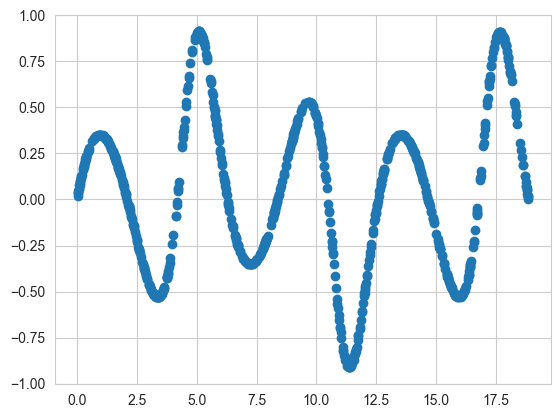

In [19]:
plt.scatter(x_train, y_train)

In [13]:
X=x.reshape((x.shape[0],1))
Y= y.reshape((y.shape[0],1))
data_XY = np.c_[X,Y]
np.random.shuffle(data_XY)
train_size = int(data_XY.shape[0] * ratio)
test_size = data_XY.shape[0] - train_size
train_X = data_XY[0:train_size, 0:-1]
train_Y = data_XY[0:train_size, -1]

NameError: name 'ratio' is not defined

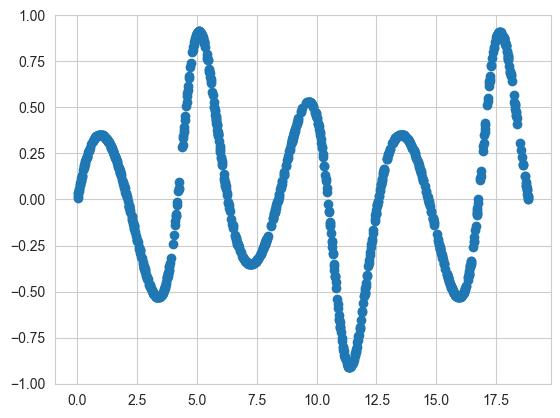

In [16]:
plt.scatter(data_XY[:,0], data_XY[:,1])

In [15]:
data_XY

array([[10.1495,  0.3478],
       [ 6.504 , -0.1466],
       [11.1813, -0.8595],
       ...,
       [10.7272, -0.3607],
       [17.8203,  0.8745],
       [16.4072, -0.3676]], dtype=float32)